# ML2: From Univariate Linear Regression to Neural Networks

In [265]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Goals
* Know how to generalize a linear regression or linear classification model to:
    * predict multiple labels
    * take multiple features
* Know the meaning and purpose of an **activation function**
    * Know about a few possible activation functions (tanh, relu, some relu variants) 
* Know how to build a **neural network** by stacking linear layers together with activation functions in between

## 
Outline

* Generalizing Linear regression:
    * What if I want to predict multiple labels?
    * What if I have multiple input features?
    * y = Wx + b
    * the bias trick, briefly
* Multiclass classification using softmax:
$$
\sigma(\vec{x})_i = \frac{e^{x_i}}{\sum_j e^{z_j}}
$$

* Nonlinear data: need nonlinear functions
* 

Idea: 

## Setup

Recall our linear regression model is: $\hat{y_i} = wx_i + b$, where:
* $(x_i, y_i)$ is an (input, output) pair, also known as (feature, label)
* $w, b$ are the weight and bias parameters that wish to optimize to find the best model
* $\hat{y_i}$ is the model's predicted label for the datapoing $x_i$

In [266]:
def model(w, b, x):
    yhat = w * x + b
    return yhat

Recall our loss function is the mean squared error loss: $\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

Plug the model (an expression for $\hat{y}_i$) into the loss, and we have:

$$
\frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2
$$


In [267]:
def mse_loss(y, yhat):
    return np.mean((y - yhat) ** 2)

What does this expression depend on - or, what is it a function of?
* The data $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, and
* The parameters $w, b$

Since the data is what it is - it never changes as we try to fit it (thank goodness) - we will write the loss as a function of only what we have control over: the parameters $w, b$:

$$
\mathcal{L}(w, b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2
$$

In [268]:
def loss_for_model(x, y, w, b):
    yhat = model(w, b, x)
    loss = mse_loss(y, yhat)
    return loss

## Visualizing the loss

Since this is a function of two parameters , I can visualize it with a 2D heat map or a 3D surface plot. Let's create some data:

In [269]:
# Generate synthetic data
n_samples = 20
x = np.linspace(0, 5, n_samples)
# True relationship: y = 2*x + 1
y_true = 2 * x + 1
# Add noise
noise = np.random.normal(0, 0.8, n_samples)
y = y_true + noise

print(f"Generated {n_samples} data points")
print(f"x range: [{x.min():.2f}, {x.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")
print(f"\nTrue parameters: w=2, b=1")

Generated 20 data points
x range: [0.00, 5.00]
y range: [1.02, 11.86]

True parameters: w=2, b=1


Now, we'll brute-force compute the loss over a dense grid of choices of $(w, b)$:

In [270]:
# Create a grid of w and b values
w_range = np.linspace(0, 4, 50)
b_range = np.linspace(-2, 4, 50)
W, B = np.meshgrid(w_range, b_range)

# Compute loss for each (w, b) combination
Loss = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w_val = W[i, j]
        b_val = B[i, j]
        Loss[i, j] = loss_for_model(x, y, w_val, b_val)

print(f"Loss surface computed: shape {Loss.shape}")
print(f"Loss range: [{Loss.min():.3f}, {Loss.max():.3f}]")

Loss surface computed: shape (50, 50)
Loss range: [0.376, 75.012]


...and visualize it:

/var/folders/_6/xflrqlk90v11_4t_8ppm4s540000gq/T/ipykernel_28358/2681587642.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


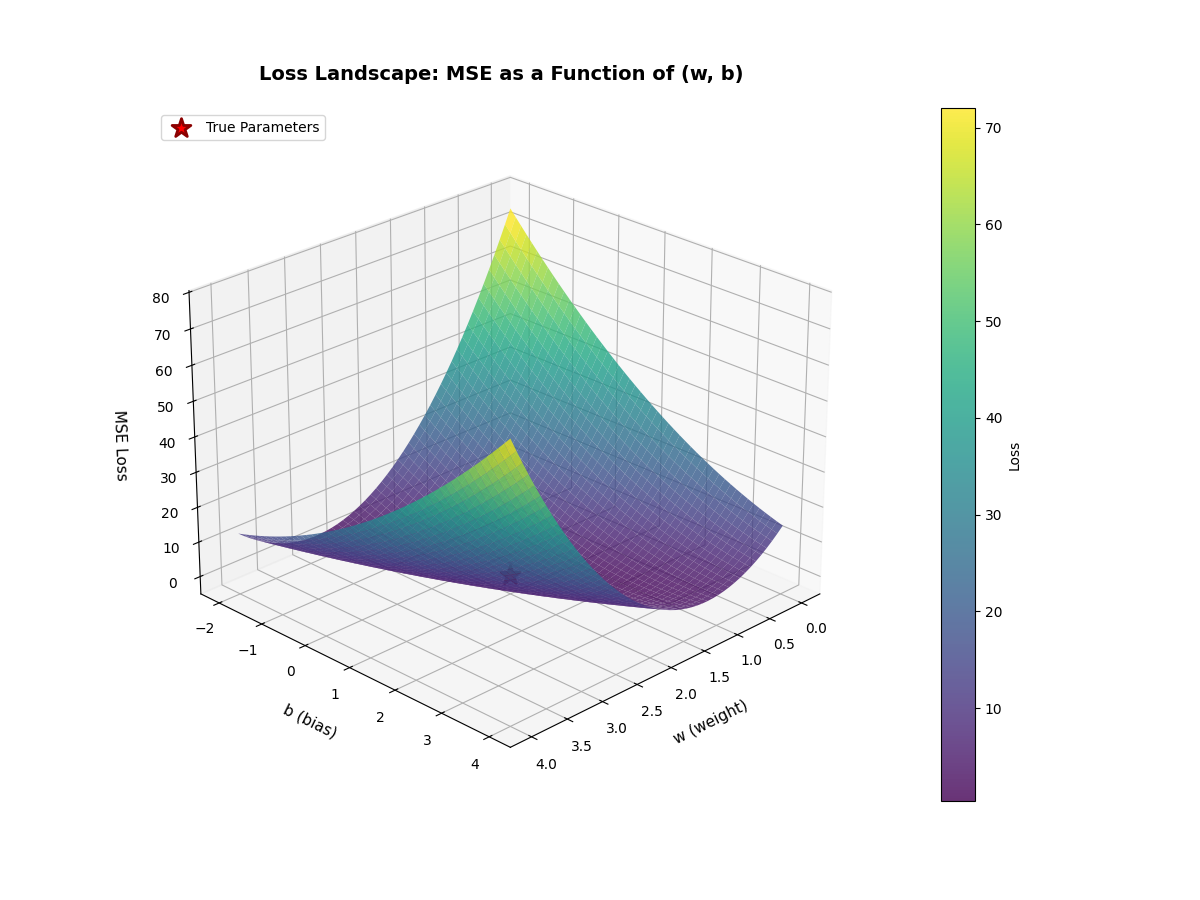

Notice: The loss surface looks like a bowl with the minimum at the bottom!


In [271]:
%matplotlib widget

# Create 3D surface plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W, B, Loss, cmap='viridis', alpha=0.8, edgecolor='none')

# Mark the true minimum
w_true, b_true = 2.0, 1.0
loss_true = loss_for_model(x, y, w_true, b_true)
ax.scatter([w_true], [b_true], [loss_true], color='red', s=200, marker='*', 
           label='True Parameters', zorder=5, edgecolor='darkred', linewidth=2)

ax.set_xlabel('w (weight)', fontsize=11, labelpad=10)
ax.set_ylabel('b (bias)', fontsize=11, labelpad=10)
ax.set_zlabel('MSE Loss', fontsize=11, labelpad=10)
ax.set_title('Loss Landscape: MSE as a Function of (w, b)', fontsize=14, fontweight='bold', pad=20)

# Add colorbar
fig.colorbar(surf, ax=ax, label='Loss', pad=0.1)

# Set viewing angle
ax.view_init(elev=25, azim=45)

ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("Notice: The loss surface looks like a bowl with the minimum at the bottom!")

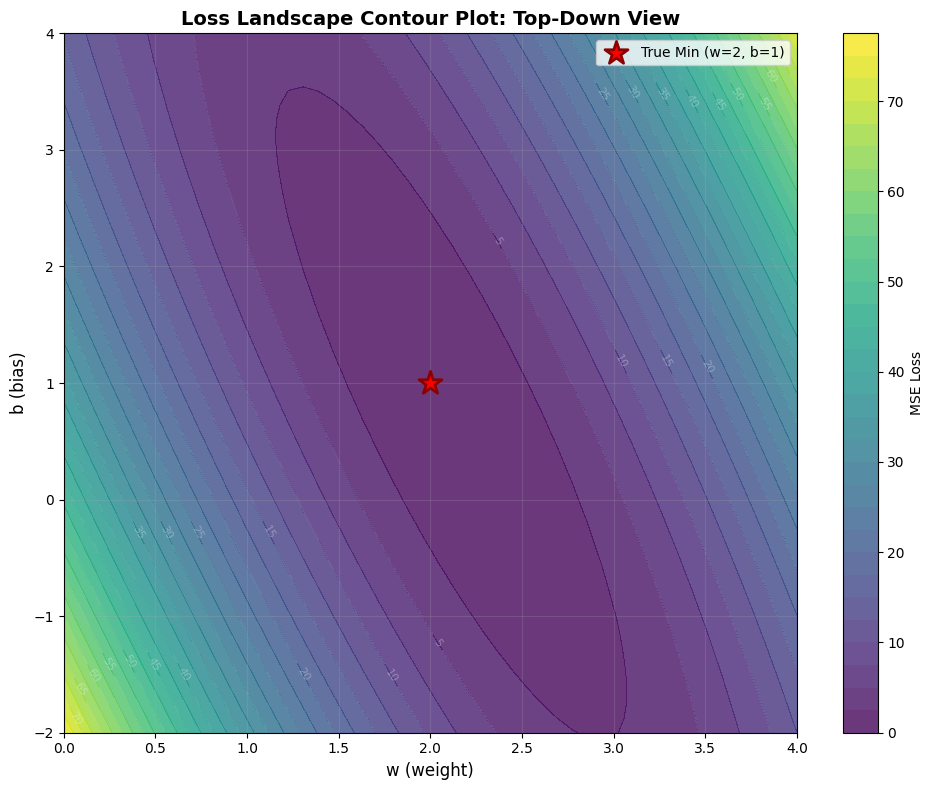

Contour lines connect points with the same loss.
The minimum is at the center where the contours are tightest.


In [273]:
%matplotlib inline

# Create contour plot (top-down view of the surface)
fig, ax = plt.subplots(figsize=(10, 8))

# Contour plot
contour = ax.contourf(W, B, Loss, levels=30, cmap='viridis', alpha=0.8)
contours = ax.contour(W, B, Loss, levels=15, colors='white', alpha=0.3, linewidths=0.5)
ax.clabel(contours, inline=True, fontsize=8)

# Mark the true minimum
ax.scatter([w_true], [b_true], color='red', s=300, marker='*', 
           label='True Min (w=2, b=1)', zorder=5, edgecolor='darkred', linewidth=2)

ax.set_xlabel('w (weight)', fontsize=12)
ax.set_ylabel('b (bias)', fontsize=12)
ax.set_title('Loss Landscape Contour Plot: Top-Down View', fontsize=14, fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, label='MSE Loss')

ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

print("Contour lines connect points with the same loss.")
print("The minimum is at the center where the contours are tightest.")

## How do we find the best $w$ and $b$?

Roll down hill. Repeat:
1. Find direction of uphill slope
2. Go the other way a bit

**Whiteboard:**
* 1D case: decide whether to go left or right using the **sign of the derivative**
* 2D case: decide what direction to go in using the **direction of the gradient**



**Homework Problem 4**

For a linear regression model under MSE loss, calculate the derivative of the loss with respect to each of the parameters $w$ and $b$. These are partial derivatives, so when differentiating with respect to $w$ we'll just treat $b$ as a constant, and vice versa.

Use the chain rule to break down the problem as follows:
* $\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial }{\partial \hat{y_i}} \left[ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\right] \cdot \frac{\partial}{\partial w} \hat{y_i}$ = 

* $\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial }{\partial \hat{y_i}} \left[ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\right] \cdot \frac{\partial}{\partial b} \hat{y_i}$ = 


After you've finished your calculations, plug them into the following functions. They'll be used in the visualizations below, so you can check if they're working!

In [278]:
def grad_wrt_w(yhat, x, y):
    return (1/len(y)) * np.sum((yhat - y) * x)
    
def grad_wrt_b(yhat, x, y):
    return (1/len(y)) * np.sum(yhat - y)

State reset: w=0.000, b=0.000, lr=0.05


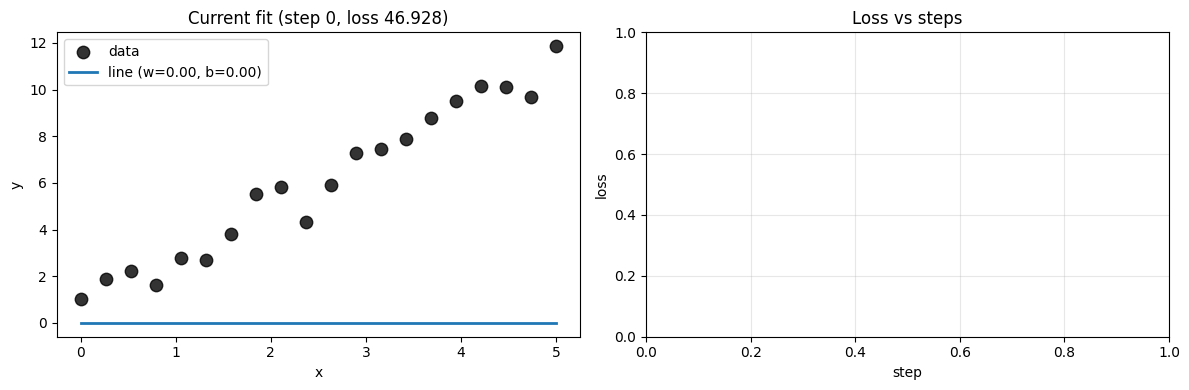

In [279]:
# Ensure inline plotting for these cells
%matplotlib inline

# State for gradient descent
state = {
    "w": 0.0,
    "b": 0.0,
    "lr": 0.05,
    "history": [],  # (step, loss, w, b)
    "step": 0,
}


def reset_state(w0=0.0, b0=0.0, lr=0.05):
    state["w"] = float(w0)
    state["b"] = float(b0)
    state["lr"] = float(lr)
    state["history"] = []
    state["step"] = 0
    print(f"State reset: w={state['w']:.3f}, b={state['b']:.3f}, lr={state['lr']}")


def plot_state():
    w, b, step = state["w"], state["b"], state["step"]
    yhat = model(w, b, x)
    loss = mse_loss(y, yhat)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Left: data + current line
    ax = axes[0]
    ax.scatter(x, y, s=80, alpha=0.8, label="data", color="black")
    ax.plot(x, yhat, color="tab:blue", linewidth=2, label=f"line (w={w:.2f}, b={b:.2f})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Current fit (step {step}, loss {loss:.3f})")
    ax.legend()

    # Right: loss history
    ax = axes[1]
    if state["history"]:
        steps = [h[0] for h in state["history"]]
        losses = [h[1] for h in state["history"]]
        ax.plot(steps, losses, marker="o", color="tab:orange")
    ax.set_xlabel("step")
    ax.set_ylabel("loss")
    ax.set_title("Loss vs steps")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def step_gd(n_steps=1):
    """Take n_steps of gradient descent and plot after stepping."""
    for _ in range(n_steps):
        yhat = model(state['w'], state['b'], x) # calculate wx + b
        
        grad_w = grad_wrt_w(yhat, x, y)
        grad_b = grad_wrt_b(yhat, x, y)
        loss = mse_loss(y, yhat)
        state["w"] -= state["lr"] * grad_w
        state["b"] -= state["lr"] * grad_b
        state["step"] += 1
        state["history"].append((state["step"], loss, state["w"], state["b"]))
    plot_state()
    print(f"After step {state['step']}: w={state['w']:.4f}, b={state['b']:.4f}, loss={loss:.4f}")


# Initialize
reset_state(w0=0.0, b0=0.0, lr=0.05)
plot_state()

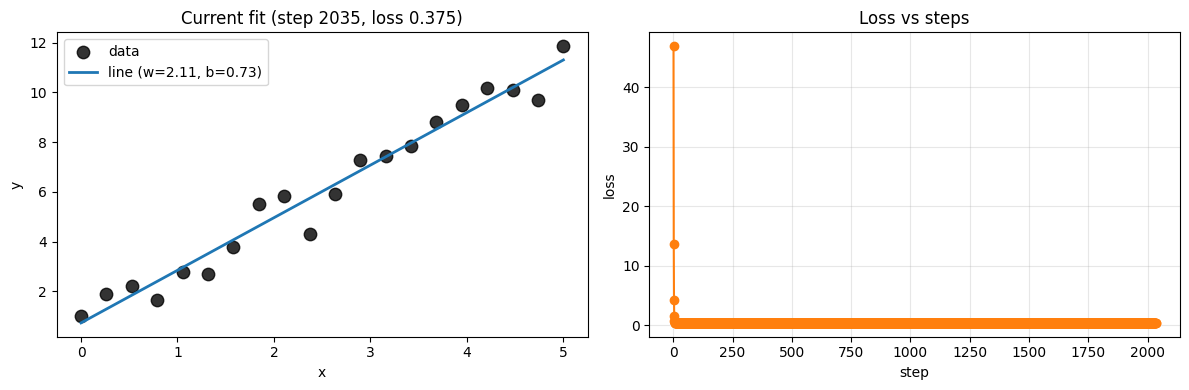

After step 2035: w=2.1148, b=0.7341, loss=0.3750


In [316]:
# Run this cell to step through the algorithm:
step_gd(n_steps=1000)

## More odds and ends (whiteboard, if time):
* Effect of learning rate
* Stochastic, batch, and minibatch